In [1]:
import os
# os.environ['PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION'] = 'python'

In [2]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import tensorflow as tf
import numpy as np
import os
import tensorflow as tf
import shutil
import random
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

from keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras_applications.imagenet_utils import _obtain_input_shape
from keras import backend as K
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.python.keras.utils.data_utils import get_file

from tensorflow.keras.utils import get_source_inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [5]:
from keras.applications.inception_resnet_v2 import preprocess_input, InceptionResNetV2

In [6]:
data_path = "dataset/Skenario 5/training"


In [7]:

# path to destination folders
train_folder = os.path.join('dataset/Skenario_9/', 'training')
validation_folder = os.path.join('dataset/Skenario_9/', 'validation')

In [8]:
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

In [9]:
os.listdir(train_folder)

['2017051001',
 '2017051017',
 '2117051009',
 '2117051019',
 '2117051027',
 '2117051043',
 '2117051048',
 '2117051050',
 '2117051095',
 '2157051001',
 '2157051006']

In [10]:
train = ImageDataGenerator()
validate = ImageDataGenerator()

In [11]:
train_gen = train.flow_from_directory(train_folder, 
                                      target_size = (299,299), 
                                      batch_size = 3)
validate_gen = validate.flow_from_directory(validation_folder, 
                                            target_size = (299,299), 
                                            batch_size = 3)

Found 122 images belonging to 11 classes.
Found 54 images belonging to 11 classes.


In [12]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299,299,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(train_gen.num_classes, activation='softmax')(x) 

model = Model(inputs=base_model.input, outputs=x)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [14]:
# model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3))
# model = Model(inputs=model.input, outputs=model.layers[-5].output)
# base_out = model.output
# base_out = Flatten()(base_out)
# base_out = Dense(train_gen.num_classes, activation='softmax')(base_out)
# model = Model(inputs=model.input, outputs=base_out)
# model.summary()

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
saveBestSqueezeNetAccuracy= tf.keras.callbacks.ModelCheckpoint('best_model_inceptionressnet_accuracy.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
saveBestSqueezeNet= tf.keras.callbacks.ModelCheckpoint('best_model_inceptionressnet_val_loss.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


In [26]:
history = model.fit(train_gen,
                    epochs=30,
                    validation_data=validate_gen)

Epoch 1/10
41/41 [==============================] - 9s 212ms/step - loss: 0.0566 - accuracy: 0.9918 - val_loss: 4.3650 - val_accuracy: 0.8148
Epoch 2/10
41/41 [==============================] - 9s 213ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 4.8973 - val_accuracy: 0.7963
Epoch 3/10
41/41 [==============================] - 9s 213ms/step - loss: 0.0802 - accuracy: 0.9754 - val_loss: 6.2578 - val_accuracy: 0.8148
Epoch 4/10
41/41 [==============================] - 9s 212ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 4.4687 - val_accuracy: 0.8148
Epoch 5/10
41/41 [==============================] - 9s 225ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 3.6969 - val_accuracy: 0.8148
Epoch 6/10
41/41 [==============================] - 9s 231ms/step - loss: 0.0178 - accuracy: 0.9918 - val_loss: 3.9633 - val_accuracy: 0.6481
Epoch 7/10
41/41 [==============================] - 10s 238ms/step - loss: 0.0583 - accuracy: 0.9754 - val_loss: 4.2657 - val_accuracy: 0.8148
Epoch

In [18]:
history

In [19]:
history.history['val_loss']

[1.3311223983764648,
 0.9554542303085327,
 0.9489163756370544,
 1.1849173307418823,
 1.0752694606781006,
 1.0728487968444824,
 1.6131194829940796,
 1.3214949369430542,
 1.8248701095581055,
 2.1678545475006104]

Mean Validation Accuracy (Epoch 50):  0.8370370507240296
Mean Validation Loss (Epoch 50):  1.3495867669582366


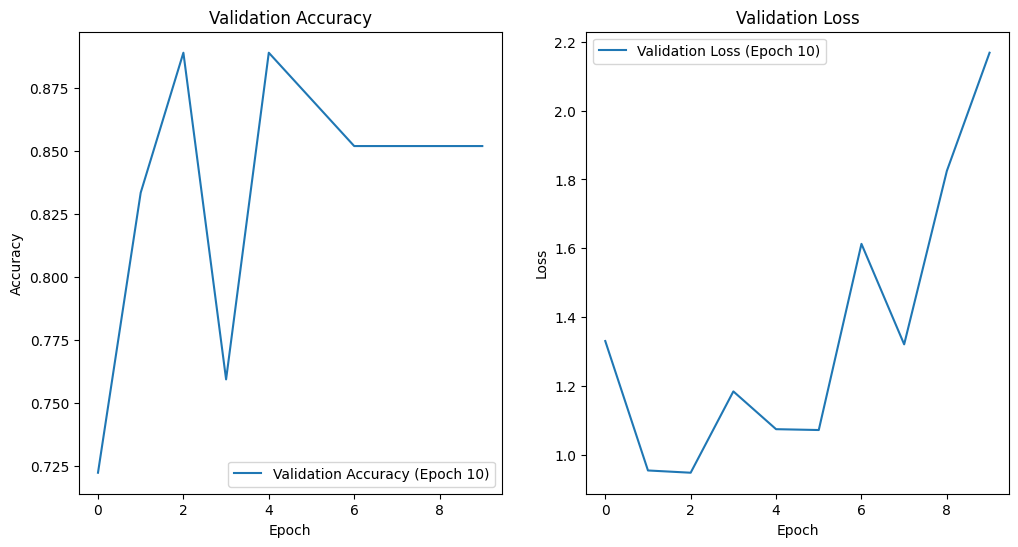

In [20]:
val_accuracy1 = history.history['val_accuracy']
val_loss1 = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(val_accuracy1, label='Validation Accuracy (Epoch 10)')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_loss1, label='Validation Loss (Epoch 10)')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print("Mean Validation Accuracy (Epoch 50): ", np.mean(val_accuracy1))
print("Mean Validation Loss (Epoch 50): ", np.mean(val_loss1))

In [27]:
#save model
model.save("model_inceptionressnet_10epoch_npm_299x299.h5")

In [21]:
train_gen.class_indices

{'2017051001': 0,
 '2017051017': 1,
 '2117051009': 2,
 '2117051019': 3,
 '2117051027': 4,
 '2117051043': 5,
 '2117051048': 6,
 '2117051050': 7,
 '2117051095': 8,
 '2157051001': 9,
 '2157051006': 10}

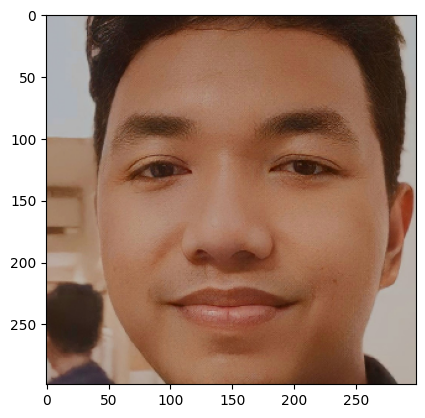

1/1 [==============================] - 0s 82ms/step
Model 1 :  ['2117051027']
Class :  [4]
Class Probability :  [3.0144678021315485e-05, 5.5420969147235155e-05, 2.301055523901141e-08, 1.916598375828471e-05, 0.7592188715934753, 0.0003867920895572752, 1.6957190382527187e-05, 1.062506726157153e-05, 5.449889613373671e-06, 4.6874538384145126e-07, 0.24025599658489227]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


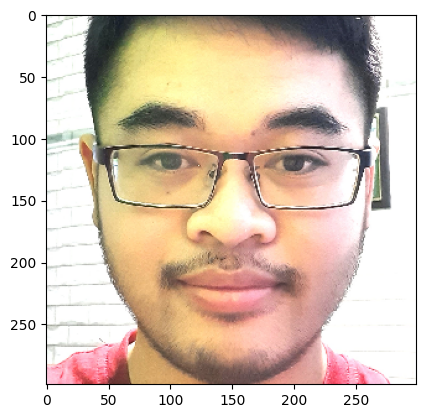

1/1 [==============================] - 0s 85ms/step
Model 1 :  ['2117051050']
Class :  [7]
Class Probability :  [2.0152292563579977e-06, 2.036948353634216e-05, 4.6159883027030446e-07, 8.89271996129537e-06, 5.717209933209233e-05, 4.194904477117234e-07, 1.4687736893392866e-06, 0.9999027252197266, 5.271219379210379e-06, 9.179735798170441e-07, 3.912856243459828e-07]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


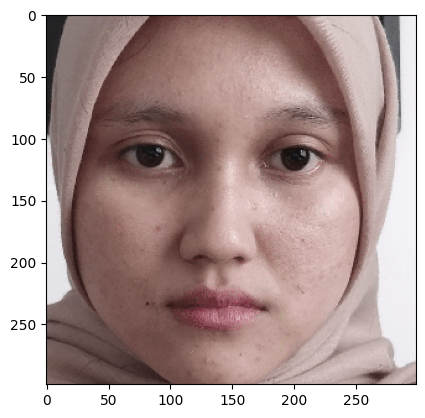

1/1 [==============================] - 0s 87ms/step
Model 1 :  ['2017051017']
Class :  [1]
Class Probability :  [1.7303409549640492e-06, 0.9994534850120544, 8.819925483294355e-07, 3.6376873140397947e-06, 0.00036285005626268685, 9.068626241059974e-05, 1.0727238077379297e-05, 6.520306669699494e-06, 1.621140108909458e-05, 2.9207374154793797e-06, 5.034018977312371e-05]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


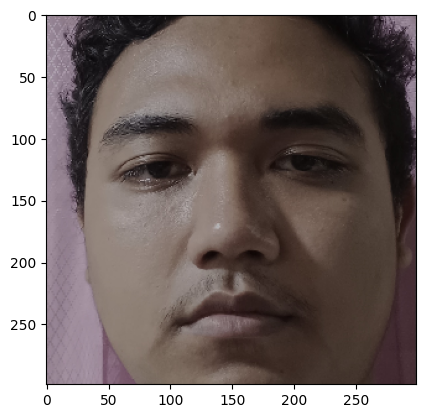

1/1 [==============================] - 0s 79ms/step
Model 1 :  ['2157051006']
Class :  [10]
Class Probability :  [9.410523489350453e-07, 7.178979558375431e-06, 2.125543296926935e-08, 3.198648983016028e-06, 1.2560725735966116e-05, 3.552087264324655e-06, 2.518185056032962e-06, 1.3499932265403913e-06, 3.280469400124275e-06, 2.4255342623291654e-07, 0.9999650716781616]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


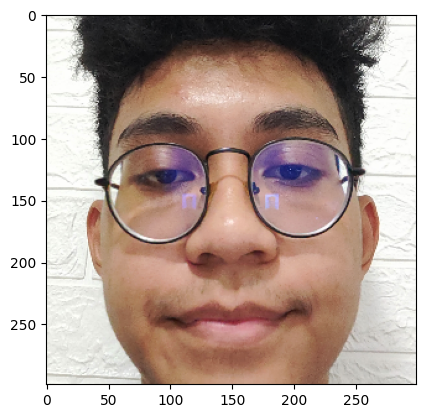

1/1 [==============================] - 0s 89ms/step
Model 1 :  ['2117051019']
Class :  [3]
Class Probability :  [2.3661086743231863e-05, 0.00017363060032948852, 1.1088121027569287e-05, 0.9993977546691895, 2.993697080455604e-06, 5.3183608542894945e-05, 2.4028815460042097e-05, 7.260787970153615e-05, 4.611110853147693e-05, 1.4518251191475429e-05, 0.00018035726679954678]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


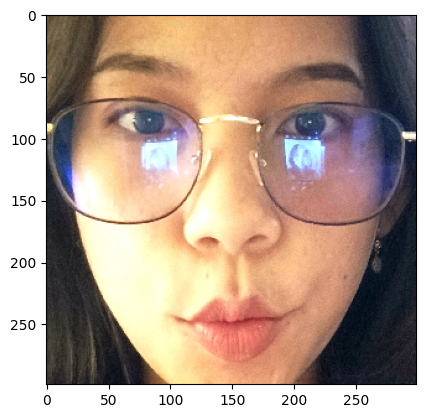

1/1 [==============================] - 0s 78ms/step
Model 1 :  ['2117051019']
Class :  [3]
Class Probability :  [2.9791135602863505e-05, 8.472367335343733e-05, 0.0009107028599828482, 0.9896411299705505, 8.013592741917819e-05, 0.0008419007644988596, 0.00013016317097935826, 0.004598875995725393, 0.003443704219534993, 0.0001507660053903237, 8.806684490991756e-05]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


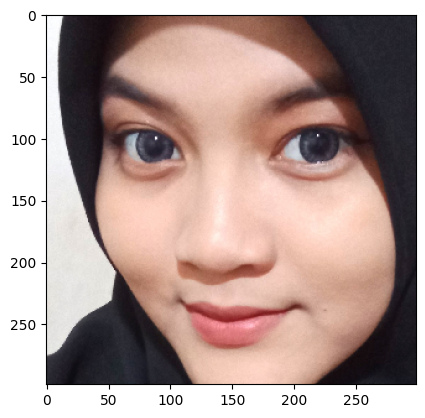

1/1 [==============================] - 0s 66ms/step
Model 1 :  ['2117051043']
Class :  [5]
Class Probability :  [1.9006234879270778e-06, 1.6458825484733097e-05, 4.3361016111020945e-08, 1.0767851108539617e-06, 7.107440069376025e-06, 0.9998986721038818, 1.705047907307744e-05, 4.750622792926151e-06, 4.954490214004181e-05, 6.041392452971195e-07, 2.736054966590018e-06]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


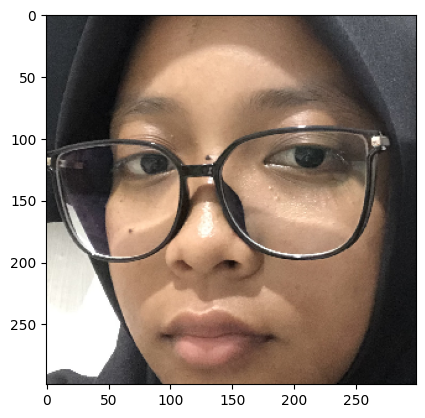

1/1 [==============================] - 0s 86ms/step
Model 1 :  ['2117051095']
Class :  [8]
Class Probability :  [6.193876288307365e-06, 7.077549526002258e-06, 6.635866611759411e-07, 1.1024197192455176e-05, 4.45320074504707e-06, 8.825591976346914e-06, 5.472591510624625e-06, 6.552565082529327e-06, 0.9999366998672485, 1.3621721564049949e-06, 1.1629157597781159e-05]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


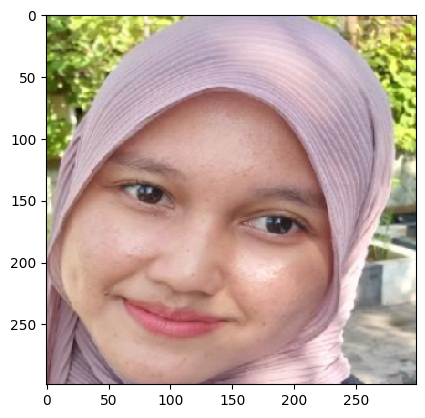

1/1 [==============================] - 0s 64ms/step
Model 1 :  ['2017051017']
Class :  [1]
Class Probability :  [2.9570543119916692e-05, 0.9993756413459778, 1.1036425348720513e-05, 5.513220821740106e-05, 0.0001266863982891664, 3.855012619169429e-05, 1.2059937944286503e-05, 3.2704057957744226e-05, 1.2990462892048527e-05, 7.494736564694904e-06, 0.0002981482248287648]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


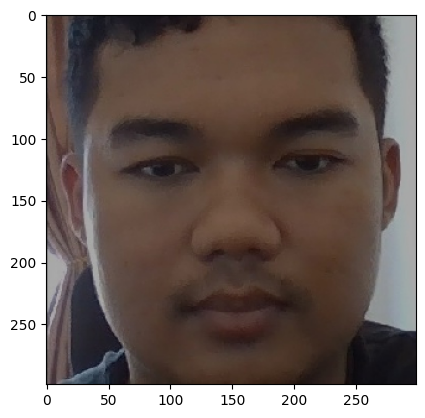

1/1 [==============================] - 0s 126ms/step
Model 1 :  ['2017051001']
Class :  [0]
Class Probability :  [0.9999986886978149, 2.529086486902088e-07, 1.2613028843588836e-07, 7.474960739273229e-08, 6.222151682777621e-08, 7.398013224246824e-08, 2.9591771522063937e-07, 1.8040857696632884e-08, 6.822965303854289e-08, 9.425853164657383e-08, 1.6560771598506108e-07]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


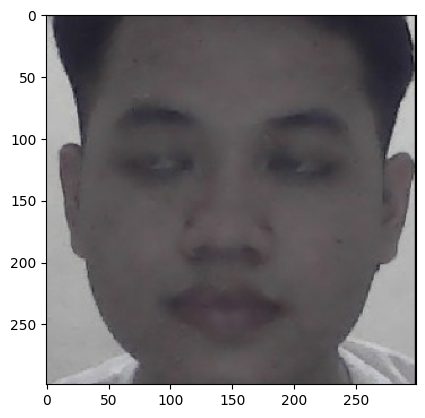

1/1 [==============================] - 0s 108ms/step
Model 1 :  ['2157051001']
Class :  [9]
Class Probability :  [1.0756252777355257e-06, 3.1750500966154505e-06, 1.5848920398298105e-08, 9.07347299516914e-08, 4.612567465756001e-07, 3.8648389022455376e-07, 8.04408443855209e-07, 5.941685685684206e-07, 2.189896690651949e-07, 0.9999910593032837, 2.1339201339287683e-06]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


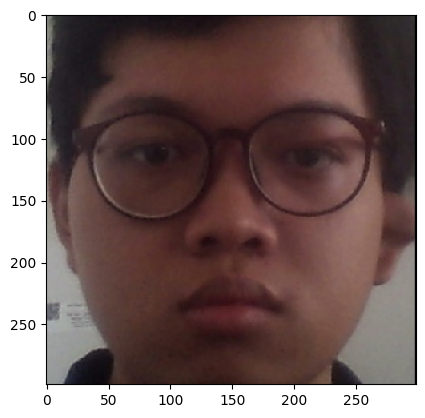

1/1 [==============================] - 0s 83ms/step
Model 1 :  ['2117051048']
Class :  [6]
Class Probability :  [1.3091770370010636e-06, 2.764577175184968e-06, 3.622102155986795e-07, 4.148436346440576e-06, 7.147195901779924e-07, 3.028026867468725e-06, 0.9999849796295166, 7.511127932957606e-07, 3.9112265426410886e-07, 1.3392165101322462e-06, 3.150834402276814e-07]
All Class  {0: '2017051001', 1: '2017051017', 2: '2117051009', 3: '2117051019', 4: '2117051027', 5: '2117051043', 6: '2117051048', 7: '2117051050', 8: '2117051095', 9: '2157051001', 10: '2157051006'}


In [27]:
test_dir = test_dir = os.path.join('dataset/skenario_9', 'testing')
for image in os.listdir(test_dir):
  image_path = os.path.join(test_dir, image)
  img = load_img(image_path, target_size=(299,299))
  plt.imshow(img)
  plt.show()

  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # rescale
  # x = preprocess_input(x)
  


  pred1 = model.predict(x)

  predicted_class1 = np.argmax(pred1, axis=1)
  labels = (train_gen.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  clas_probs = pred1.tolist()[0]

  predictions = [labels[k] for k in predicted_class1]
  print('Model 1 : ', predictions)
  print('Class : ', predicted_class1)
  print('Class Probability : ', clas_probs)
  print('All Class ', labels)

In [29]:
model.save('model/skenario_9_inception_ressnet_v2.h5')